# Worksheet 02

Name: Zihan Li

UID: U83682995

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

Top down approach may lead to integration challenges.

b) What is a drawback of the bottom up approach?

Bottom-up approach can cause developers to lose sight of the overall project vision by focusing too much on the details of individual components.

c) What are 3 things you can do to have a better debugging experience?

Utilize a Debugger, Implement Unit Testing, Maintain Clean and Modular Code

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [43]:
%pip install pandas
%pip install matplotlib

import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [44]:
print("there are " +  str(df.isna().any(axis=1).sum()) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [45]:
df = df.dropna(axis=1, thresh=len(df) - 200)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [46]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

C:\Users\73907\AppData\Local\Temp\ipykernel_21816\48985843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [47]:
def extract_name_parts(name):
    parts = name.split(' ')
    last_name = parts[0][: -1]
    title = parts[1][: -1]
    first_name = parts[2]
    middle_name = ''
    if len(parts) > 3:
        middle_name = parts[3]
    return first_name, middle_name, last_name, title

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = df.apply(lambda x: pd.Series(extract_name_parts(x['Name'])), axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Complete the code below to replace all missing ages with the average age

In [48]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

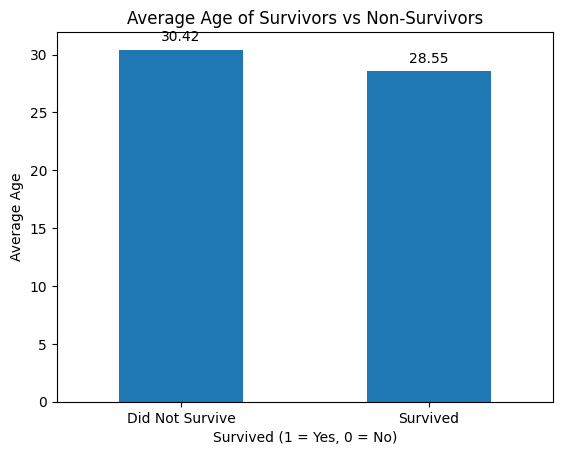

In [49]:
import matplotlib.pyplot as plt
average_ages = df.groupby('Survived')['Age'].mean()


ax = average_ages.plot(kind='bar')
plt.title('Average Age of Survivors vs Non-Survivors')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Average Age')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0) 
for p in ax.patches: 
    ax.annotate(f'{p.get_height():.2f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',  
                xytext=(0, 9),  
                textcoords='offset points') 
plt.show()

My observations: Average age of those that survived is higher than those that did not survive. but the difference is not significant.